## Exploration 07

# 📕불러오기 ＆ 경로 지정하기

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


(684, 1200, 3)
(400, 700, 3)
(2681, 2681, 3)
(673, 729, 3)


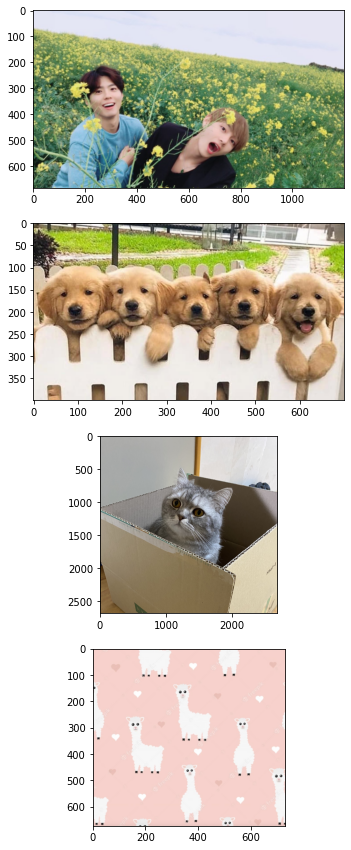

In [2]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.

plt.figure(figsize=(15,15))

# 이미지 1 _ 인물 블러
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.subplot(4,1,1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))

# 이미지 2 _ 멍멍이 블러
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image2.jpg'  
img_orig2 = cv2.imread(img_path2) 

print(img_orig2.shape)
plt.subplot(4,1,2)
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))

# 이미지 3 _ 야옹이 크로마키
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image3.JPG'  
img_orig3 = cv2.imread(img_path3) 

print(img_orig3.shape)
plt.subplot(4,1,3)
plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))

# 이미지4 _ 라마 크로마키
img_path4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/lama.png'  
img_orig4 = cv2.imread(img_path4) 

print(img_orig4.shape)
plt.subplot(4,1,4)
resize_img = cv2.resize(img_orig4,(2681,2681), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(img_orig4, cv2.COLOR_BGR2RGB))
plt.show()


In [3]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fa570555ac0>)

In [4]:
# 그다음 다운로드한 모델을 이용해 PixelLib로 우리가 사용할 세그멘테이션 모델을 생성합니다.

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [6]:
# 이제 모델에 이미지를 입력해 볼게요. (배경으로만 사용할 사진은 이걸 할 필요가 없다./마스크를 제외한 걸 블러 처리를 하기 위함.)
segvalues, output = model.segmentAsPascalvoc(img_path)
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)

plt.imshow(output)
plt.show()

In [7]:
segvalues
segvalues2
segvalues3

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [8]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
print("_"*25)

for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])
print("_"*25)
    
for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
_________________________
background
dog
pottedplant
_________________________
background
cat


# 📕 마스크 만들기

In [9]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

# 이미지 1 _ 인물 블러
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3


print(colormap[:20])
print("_"*25)

# 이미지 2 _ 멍멍이 블러
colormap2 = np.zeros((256, 3), dtype = int)
ind2 = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap2[:, channel] |= ((ind2 >> channel) & 1) << shift
    ind2 >>= 3


print(colormap2[:20])
print("_"*25)


# 이미지 3 _ 야옹이 크로마키
colormap3 = np.zeros((256, 3), dtype = int)
ind3 = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel3 in range(3):
        colormap3[:, channel] |= ((ind3 >> channel) & 1) << shift
    ind3 >>= 3


print(colormap3[:20])
print("_"*25)


[[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]
 [128   0 128]
 [  0 128 128]
 [128 128 128]
 [ 64   0   0]
 [192   0   0]
 [ 64 128   0]
 [192 128   0]
 [ 64   0 128]
 [192   0 128]
 [ 64 128 128]
 [192 128 128]
 [  0  64   0]
 [128  64   0]
 [  0 192   0]
 [128 192   0]]
_________________________
[[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]
 [128   0 128]
 [  0 128 128]
 [128 128 128]
 [ 64   0   0]
 [192   0   0]
 [ 64 128   0]
 [192 128   0]
 [ 64   0 128]
 [192   0 128]
 [ 64 128 128]
 [192 128 128]
 [  0  64   0]
 [128  64   0]
 [  0 192   0]
 [128 192   0]]
_________________________
[[  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0 128]
 [  0   0 128]
 [  0   0 128]
 [  0   0 128]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0 128]
 [  0   0 128]
 [  0   0 128]
 [  0   0 128]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]]
_________________________


In [10]:
colormap[12] # 사람 고양이 강아지 번호를 카운트해서 바꿔 넣어야 함. 앞뒤 바꿔야 함.

array([ 64,   0, 128])

In [11]:
seg_color = (128,128,192)
seg_color2 = (128,0,64)
seg_color3 = (0,0,64)

(684, 1200)


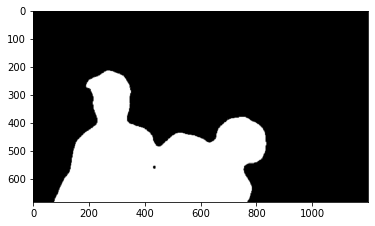

(400, 700)


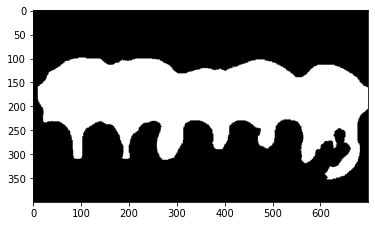

(2681, 2681)


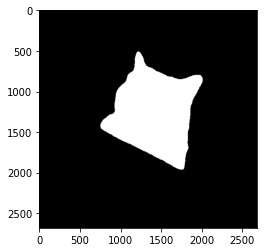

In [12]:
# 이제 seg_color로만 이루어진 마스크를 만들어 봅시다.
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다

# 이미지1
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray') # 흑백으로 보겠다
plt.show()

# 이미지2
seg_map2 = np.all(output2==seg_color2, axis=-1)
print(seg_map2.shape)
plt.imshow(seg_map2, cmap='gray')
plt.show()

# 이미지3
seg_map3 = np.all(output3==seg_color3, axis=-1)
print(seg_map3.shape)
plt.imshow(seg_map3, cmap='gray')
plt.show()

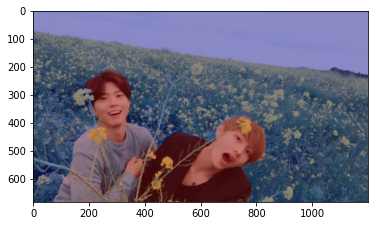

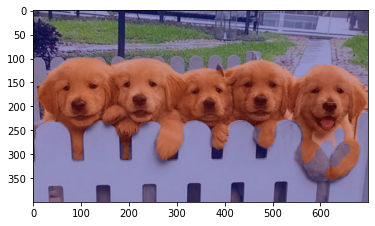

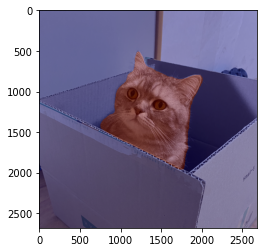

In [13]:
# 이미지 1

img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 2
img_show2 = img_orig2.copy()
img_mask2 = seg_map2.astype(np.uint8) * 255
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)
img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 3
img_show3 = img_orig3.copy()
img_mask3 = seg_map3.astype(np.uint8) * 255
color_mask3 = cv2.applyColorMap(img_mask3, cv2.COLORMAP_JET)
img_show3 = cv2.addWeighted(img_show3, 0.6, color_mask3, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))
plt.show()

# 📕 뒷배경 날리기

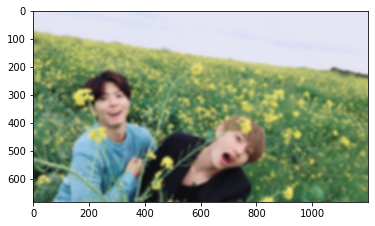

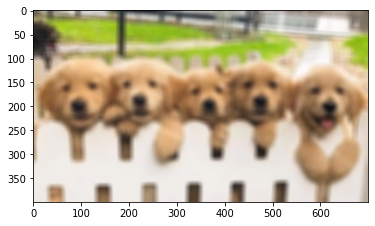

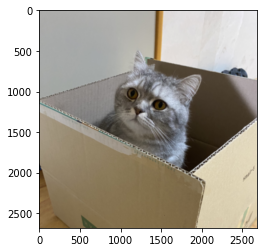

In [18]:
# (13,13)은 blurring kernel size를 뜻합니다 = 뒷배경을 어떤 강도로 날릴 것인가 / (세로를 흔드는 정도, 가로를 흔드는 정도) 인 것 같음.
# 블러처리_이미지1
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 블러처리_이미지2
img_orig_blur2 = cv2.blur(img_orig2, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))
plt.show()

# 블러처리_이미지3
img_orig_blur3 = cv2.blur(img_orig3, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur3, cv2.COLOR_BGR2RGB))
plt.show()

# 📕 배경만 추출하기

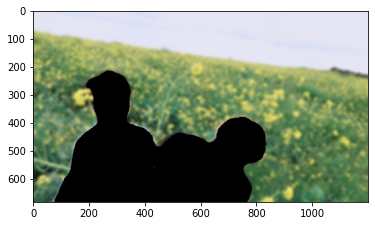

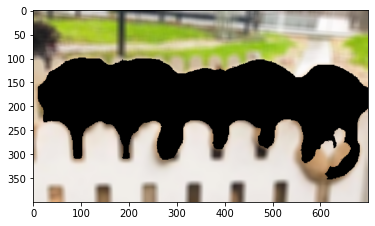

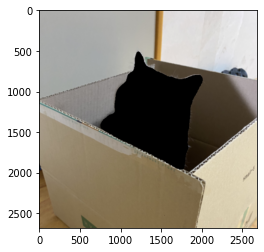

In [19]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출하겠습니다.

# 이미지 1
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지2
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask2)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지3
img_mask_color3 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
img_bg_mask3 = cv2.bitwise_not(img_mask_color3)
img_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_bg_mask3)
plt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))
plt.show()

# 📕 다시 합치기

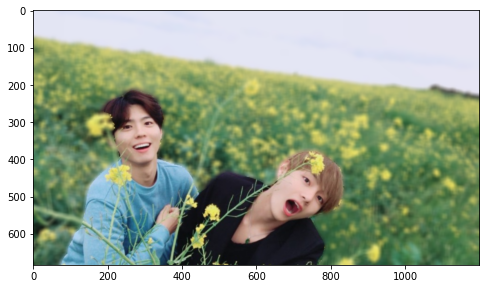

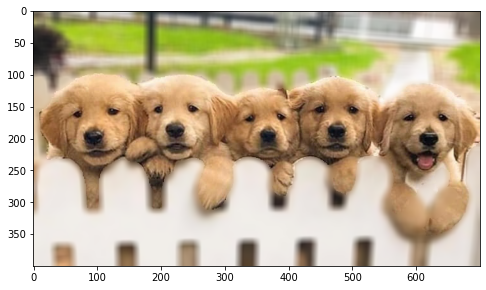

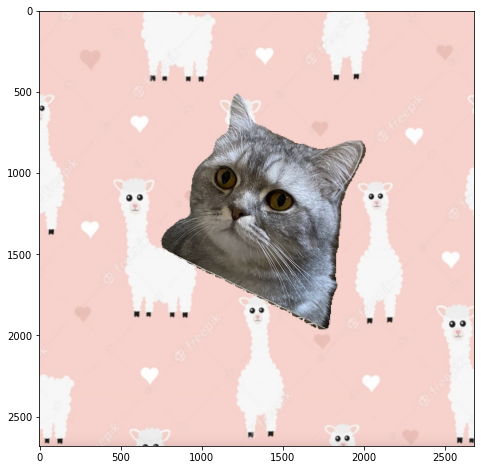

In [20]:
# 이미지1
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.figure(figsize=(8,8)) # 크게 보기
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지2
img_concat2 = np.where(img_mask_color2==255, img_orig2, img_bg_blur2)

plt.figure(figsize=(8,8)) # 크게 보기
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지3
img_concat3 = np.where(img_mask_color3==255, img_orig3, resize_img)

plt.figure(figsize=(8,8)) # 크게 보기
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.show()


# 📕 회고

### resize와 np.where를 선택하게 된 전체 과정
이미지 1, 2는 각각 인물과 동물 사진의 뒷배경을 blur 처리한 경우입니다.<br>
이미지 3은 크로마키를 시도하였습니다.<br>
일반적으로 초록색 배경을 사용하는 크로마키와 달리
뒷배경으로 사용할 이미지를 불러와 합쳤습니다.<br>
이때 뒷배경으로 사용된 이미지 4와 원본 이미지 3이 서로 크기가 달라 오류가 생겼고 크기를 맞춰주는 방법을 생각해야 했습니다.<br>
이 과정에서 padding을 사용했던 동료의 실패 이야기를 듣고 padding 외의 다른 방법을 다른 동료들과 함께 고민했습니다.<br>
EX03에서 사용했던 resize와 np.where를 활용하여 원본에서 살리고자 하는 부분 외 나머지 부분을 스티커처럼 붙이는 방법을 선택했습니다.<br>

### 이미지 4를 합치기 위해 바꿔준 부분
이미지 1, 2, 3에 변수만 수정한 동일 코드를 사용했고<br>
이미지 4를 처음 불러오는 과정에서 resize, 마지막 다시 합치는 부분에서 np.where로 수정한 것이 전부입니다.

### 오류가 생겼던 부분 
    1. 원본 이미지와 뒷배경 이미지의 사이즈가 달라 생겼던 오류.
    2. np.where를 사용하는 과정에서 경로지정 및 변수를 잘못 입력해 생겼던 오류.
    3. 심각한 오류는 아니지만, 블러 처리 과정에서 영역이 약간 잘못 설정되는 문제.

### EX07을 진행하며 알게 된 것들
    1. np.where() 괄호 안의 3가지가 의미하는 것.
    2. 이미지의 크기가 다르면 합칠 때 오류가 날 수 있다.
    3. 블러 처리 과정에서 마스크 영역을 지정할 때, 옷이 따라 오거나 하는 부분은 사진 명암비 조절을 통해서 수정할 수 있다. 모델을 수정하기 어렵기 때문에 적절한 사진을 고르는 것이 중요하다. EX01의 경우에도 그렇고 이미지를 다룰 때는 전처리 과정이 중요한 이유를 알 것 같다.